<a href="https://colab.research.google.com/github/Andreina-A/Data620/blob/main/Data620AssignmentGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Andreina Arias
<br>Assignment Graph Visualization


Loaded a graph database of your choosing from a text file on social circles:Facebook from Stanford SNAP collection(https://snap.stanford.edu/data/ego-Facebook.html). The dataset was large with 88,234 edges and 4,039 nodes. The full network using NetworkX, the graph appeared highly dense and crowded, which is typical for social networks of this size. I decided to create a subset of the neighbors of node 0, to make the data more manageable especially when calculating the diameter as it took too long to caculate with the entire dataset.

In [58]:
import networkx as net
import matplotlib.pyplot as plt
import gzip
import io
import requests
from networkx import algorithms
from networkx.algorithms import diameter


#loaded graph on social circles:Facebook
#view data as a table
url= "https://snap.stanford.edu/data/facebook_combined.txt.gz"
response= requests.get(url)

with gzip.open(io.BytesIO(response.content), mode='rt') as f:
 all_lines = f.readlines()   # Load entire file as list

G = net.parse_edgelist(all_lines, nodetype=int)

print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")




Nodes: 4039, Edges: 88234


Used networkx to visualize the netword, and it was too crowded.

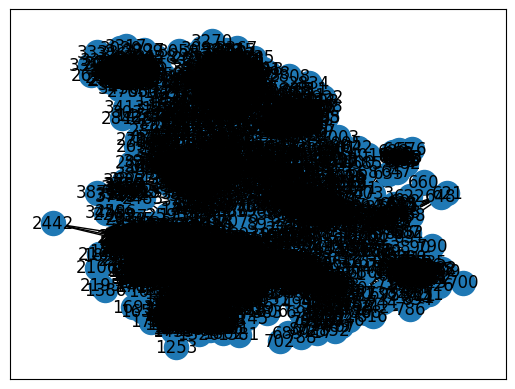

In [31]:
#visualized data
net.draw_networkx(G)

I decided to compute the average clustering coefficient to measure how tightly users form friendship groups, and I computed the average shortest path length to measure how socially distant users are from one another.

In [33]:

#Metrics
#Average cluster
#Measures the degree to which nodes in a graph tend to cluster together
clustering= net.average_clustering(G)
print(f"Average clustering: {clustering}")

#Average shortest path length
#Measures the average number of steps along the shortest paths for all possible pairs of network nodes
avg_path= net.average_shortest_path_length(G)
print(f"Average shortest path length: {avg_path}")

#Diameter
#Longest shortest path between any two nodes.
diameter= net.diameter(G)
print(f"Diameter: {diameter}")


Shortest path: <generator object all_pairs_shortest_path at 0x7a19b78309a0>
Average clustering: 0.6055467186200862
Average shortest path length: 3.6925068496963913
Diameter: 8


The diameter of 8 means two most distant users in the entire Facebook dataset are 8 friendship steps apart. A diameter of 8 does not mean the two users share seven mutual friends, it means they are connected through a chain of eight friendship links, involving seven intermediate users(user A->person 1->person 2->person 3->person 4->person 5->person 6->person 7->user B).For the shortest path on average, any two users in the network are about 3.7 friendship steps apart(network highly connected). The cluster is closer to one, suggesting that the clusters are very densed.

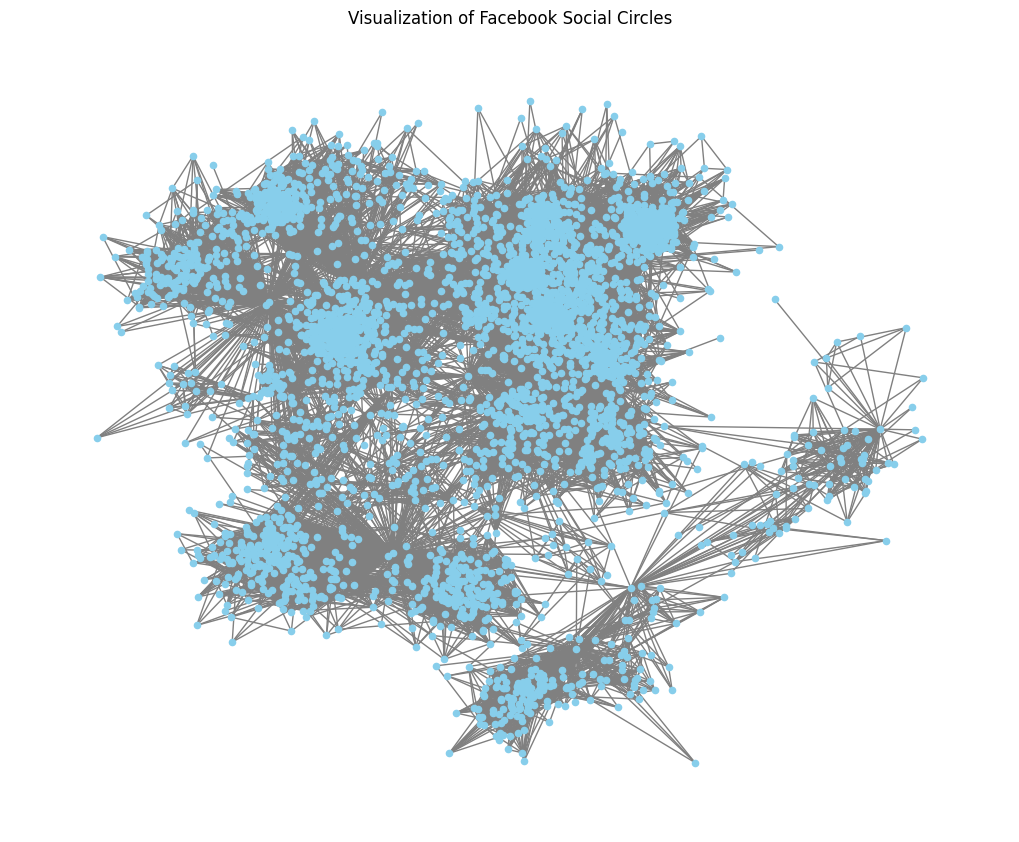

In [57]:
#visual without number
plt.figure(figsize=(10, 8))
pos = net.spring_layout(G, seed=42)  # Set seed to have consistent result
net.draw(G,pos, node_size=20, node_color='skyblue', edge_color='gray')
plt.title("Visualization of Facebook Social Circles")
plt.show()

In [38]:
#Made a subset as the data was too large, chose a to look at node 0 and it's neighbors.
ego_node = 0 #picked 0 as the node
G_small = net.ego_graph(G, ego_node)

print("Ego Graph")
print("Nodes:", G_small.number_of_nodes())
print("Edges:", G_small.number_of_edges())

Ego Graph
Nodes: 348
Edges: 2866


In [42]:
#Subset diameter, this will tells us the longest shortest path between two users in this subset.
diameter = net.diameter(G_small)
print("Diameter:", diameter)

Diameter: 2


In [43]:
clustering = net.average_clustering(G_small)
print("Average Clustering Coefficient for the subset:", clustering)

Average Clustering Coefficient: 0.6545573724252243


In [59]:
#Average shortest path length
avg_path2= net.average_shortest_path_length(G_small)
print(f"Average shortest path length: {avg_path2}")

Average shortest path length: 1.9525323793434695


The cluster for the subset was closer to one just like the cluster average of the entitre dataset. The cluster being close to one shows that many friends of a user are also friends with each other, showing tight friendship groups. The diameter was smaller for the subset as it was more locally concentrated, I selected th node of 0 which may have been in a tightly connected region, presenting a local community, and not the global network. The diameter of the subset being two suggest that in the subset there is a tight community structure, either everyone is friends with each out share at least one mutual friend.Overall, Facebook ego networks are tightly knit communities with strong local friend clusters.

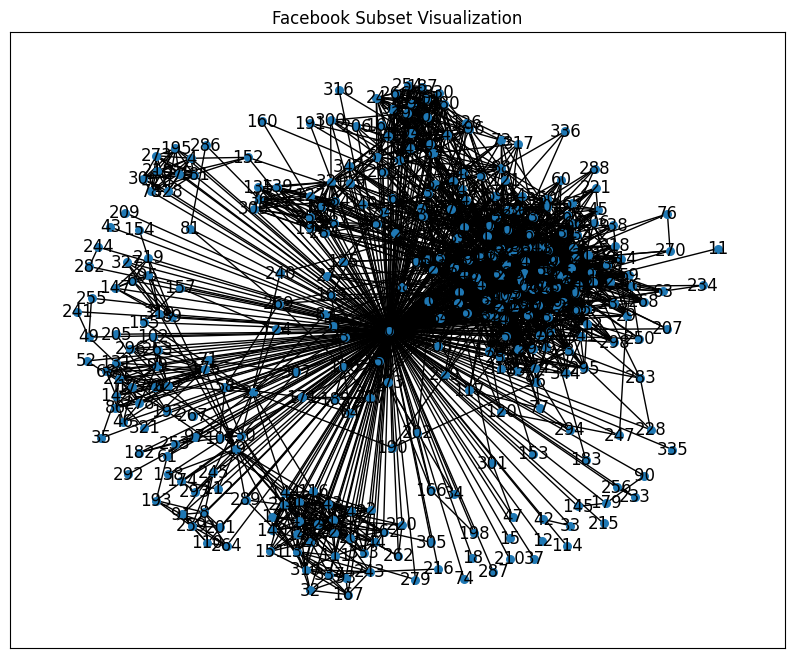

In [54]:
#Subset Graph
plt.figure(figsize=(10, 8))
pos2 = net.spring_layout(G_small, seed=40)
net.draw_networkx(G_small,pos2, node_size=30)
plt.title("Facebook Subset Visualization")
plt.show()

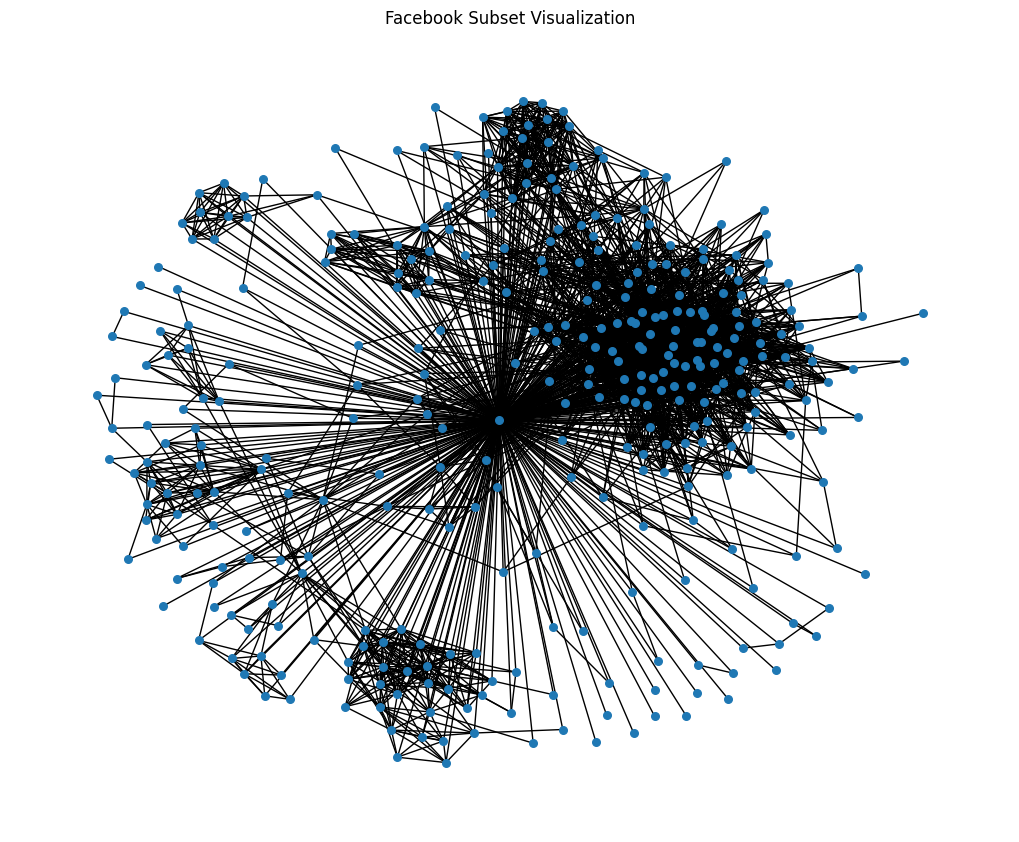

In [55]:
#Subset Graph without node numbers
plt.figure(figsize=(10, 8))
pos2 = net.spring_layout(G_small, seed=40)
net.draw(G_small,pos2, node_size=30)
plt.title("Facebook Subset Visualization")
plt.show()

Comparing the full network and the subset demonstrates the difference between global and local structure. While the full Facebook network had a maximum separation of 8 steps, locally within communities users are much more tightly connected. Overall, the Facebook social network exhibits classic small-world properties based on their high clustering and short average path lengths.